<a href="https://colab.research.google.com/github/Wilson30678tw/Computer-Vision-Project/blob/main/Modify_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/IAT360/FaceDetectionDataset/images'

data_yaml = f"""
train: {base_dir}/train
val: {base_dir}val

nc: 1
names: ['face']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Mounted at /content/drive


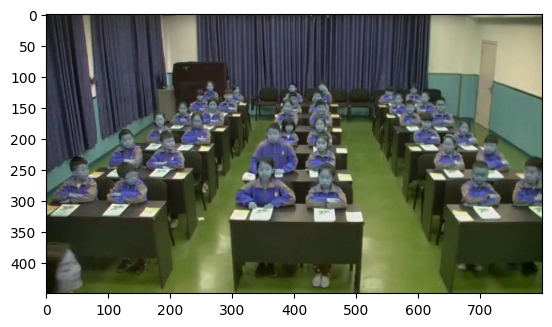

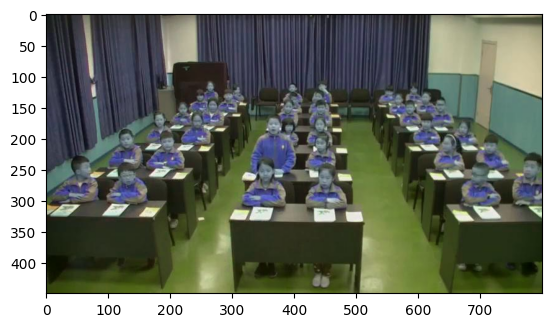

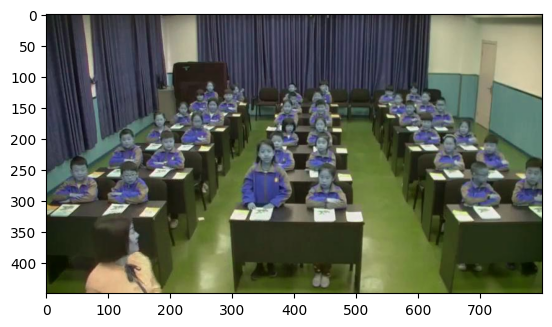

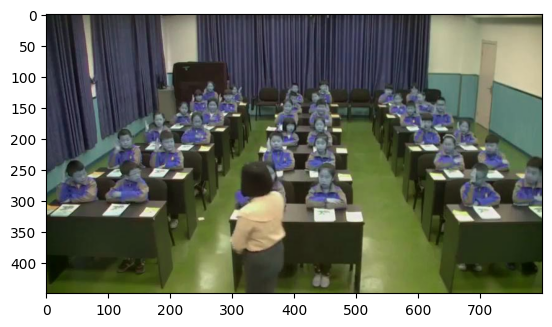

In [3]:
import cv2
import matplotlib.pyplot as plt

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(base_dir, "train"))):
    img = cv2.imread(os.path.join(base_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [4]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [20]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [21]:
from ultralytics import YOLO
import os
os.makedirs('/content/drive/MyDrive/model_direct', exist_ok=True)


model = YOLO('yolov8n.pt')

#model.tune(data="coco8.yaml", epochs=30, iterations=300, optimizer="AdamW", imgsz=640)

model.train(
    data='/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml',
     epochs=50 ,
     lr0=0.001 ,
     batch=16,
     imgsz= 640,
)

model.save('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/train.cache... 330 images, 0 backgrounds, 0 corrupt: 100%|██████████| 330/330 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/141.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/186.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/223.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.07G      1.577      2.447      1.208        650        640: 100%|██████████| 21/21 [00:16<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]


                   all        230       6366     0.0901      0.977      0.803      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.86G      1.045     0.8305     0.9355        504        640: 100%|██████████| 21/21 [00:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


                   all        230       6366      0.844      0.558      0.694      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.76G     0.9213     0.6819     0.9001        505        640: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        230       6366      0.822      0.737      0.815      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.67G      0.849     0.6279     0.8839        535        640: 100%|██████████| 21/21 [00:12<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        230       6366      0.833      0.432      0.591      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.43G     0.7938     0.5959     0.8804        613        640: 100%|██████████| 21/21 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        230       6366      0.827      0.334      0.402      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.58G     0.8407     0.5883     0.8877        622        640: 100%|██████████| 21/21 [00:10<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


                   all        230       6366      0.849      0.324      0.394       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.08G     0.8062     0.5596     0.8751        747        640: 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        230       6366      0.783       0.35      0.427      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.91G      0.794      0.554     0.8767        552        640: 100%|██████████| 21/21 [00:09<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        230       6366      0.699       0.47      0.577      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.61G     0.7626     0.5238     0.8634        685        640: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        230       6366      0.618      0.522      0.614      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.71G     0.7445     0.5234     0.8671        591        640: 100%|██████████| 21/21 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


                   all        230       6366      0.906      0.315      0.405       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.55G     0.7489     0.5131     0.8635        552        640: 100%|██████████| 21/21 [00:10<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        230       6366      0.891      0.328      0.399      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.45G     0.7091     0.4865      0.859        487        640: 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]


                   all        230       6366      0.681      0.558      0.659      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.66G     0.7061     0.4818     0.8558        691        640: 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        230       6366      0.695      0.377      0.478      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.72G     0.6933      0.471     0.8545        583        640: 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        230       6366      0.883      0.326      0.417      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.81G     0.7048     0.4657     0.8578        625        640: 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        230       6366      0.786      0.352      0.464      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.58G     0.6932     0.4572     0.8497        585        640: 100%|██████████| 21/21 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]

                   all        230       6366      0.888      0.317      0.388      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.64G     0.6824     0.4535     0.8524        573        640: 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


                   all        230       6366      0.744      0.444      0.547      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.76G     0.6804     0.4424     0.8497        474        640: 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


                   all        230       6366      0.699      0.422      0.506      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.29G     0.6827     0.4433     0.8476        599        640: 100%|██████████| 21/21 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


                   all        230       6366      0.765      0.417       0.52      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.97G     0.6586     0.4454     0.8477        367        640: 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        230       6366      0.738      0.452      0.546      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.79G     0.6464     0.4302     0.8424        547        640: 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        230       6366      0.796       0.37      0.442      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.83G     0.6378     0.4169     0.8403        534        640: 100%|██████████| 21/21 [00:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        230       6366      0.728      0.347      0.412      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.22G     0.6511     0.4223     0.8443        597        640: 100%|██████████| 21/21 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        230       6366       0.78      0.327      0.381      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.53G     0.6576     0.4259     0.8447        577        640: 100%|██████████| 21/21 [00:14<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


                   all        230       6366      0.886      0.334      0.462      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.09G     0.6417     0.4136     0.8416        601        640: 100%|██████████| 21/21 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]


                   all        230       6366      0.808      0.336      0.431      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.84G     0.6352     0.4092      0.838        565        640: 100%|██████████| 21/21 [00:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


                   all        230       6366      0.693       0.53      0.647      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.38G     0.6338     0.4082     0.8412        526        640: 100%|██████████| 21/21 [00:09<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]


                   all        230       6366      0.661      0.582      0.671      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.67G      0.632     0.4016     0.8358        531        640: 100%|██████████| 21/21 [00:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]

                   all        230       6366      0.679      0.486      0.576      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.69G     0.6291      0.399     0.8406        556        640: 100%|██████████| 21/21 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


                   all        230       6366      0.576      0.532      0.582      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.2G     0.6174     0.3941     0.8368        559        640: 100%|██████████| 21/21 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


                   all        230       6366      0.574      0.518      0.576       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.18G     0.6058     0.3901     0.8345        632        640: 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s]


                   all        230       6366      0.715      0.401      0.519      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G     0.6252     0.3936     0.8376        453        640: 100%|██████████| 21/21 [00:12<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]


                   all        230       6366      0.634      0.512       0.59      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.61G     0.6128     0.3866      0.832        795        640: 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        230       6366       0.62      0.502      0.585      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.46G     0.5938     0.3749     0.8294        619        640: 100%|██████████| 21/21 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        230       6366      0.716      0.381      0.497      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.77G     0.6099     0.3796     0.8378        486        640: 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        230       6366      0.784      0.366      0.499      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.96G     0.5997     0.3742     0.8338        479        640: 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]


                   all        230       6366      0.745      0.343      0.432      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.34G     0.5855     0.3721     0.8303        592        640: 100%|██████████| 21/21 [00:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        230       6366      0.813      0.329      0.442      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.48G     0.5907     0.3712     0.8315        557        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        230       6366      0.815       0.34      0.471      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.09G        0.6     0.3735     0.8328        598        640: 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        230       6366      0.693      0.417      0.531      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.18G     0.5775     0.3641     0.8334        452        640: 100%|██████████| 21/21 [00:15<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        230       6366      0.709      0.417      0.527      0.359


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.84G     0.5863     0.3806     0.8294        312        640: 100%|██████████| 21/21 [00:24<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


                   all        230       6366      0.764       0.45      0.566      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.76G     0.5772     0.3709     0.8279        321        640: 100%|██████████| 21/21 [00:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


                   all        230       6366      0.747      0.411      0.528      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.76G     0.5599     0.3573     0.8262        281        640: 100%|██████████| 21/21 [00:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        230       6366      0.704      0.405      0.518      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.76G     0.5579     0.3525     0.8252        294        640: 100%|██████████| 21/21 [00:13<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        230       6366      0.689      0.369      0.438      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.75G     0.5524     0.3471     0.8243        253        640: 100%|██████████| 21/21 [00:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]


                   all        230       6366      0.705      0.372      0.449      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.76G     0.5529     0.3501     0.8192        331        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        230       6366      0.755      0.377      0.476      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.76G     0.5427     0.3418     0.8217        285        640: 100%|██████████| 21/21 [00:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        230       6366       0.75      0.413      0.537      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.76G     0.5415     0.3404     0.8216        249        640: 100%|██████████| 21/21 [00:14<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        230       6366      0.819      0.345      0.442      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.75G     0.5387     0.3387     0.8208        341        640: 100%|██████████| 21/21 [00:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        230       6366      0.811      0.335      0.426      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.76G     0.5338     0.3344     0.8209        324        640: 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        230       6366      0.813      0.334      0.424      0.316

50 epochs completed in 0.250 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.73s/it]


                   all        230       6366      0.822      0.738      0.815      0.487
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train4


In [14]:
# from ultralytics import YOLO

# model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

In [22]:
#model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:18<00:00,  1.23s/it]


                   all        230       6366      0.826      0.739      0.816      0.488
Speed: 0.8ms preprocess, 6.4ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to runs/detect/train42


0.7386113729186302

In [24]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train52/confusion_matrix_normalized.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train52/confusion_matrix_normalized.png'

100%|██████████| 490k/490k [00:00<00:00, 1.80MB/s]


image 1/1 /content/9e3540de132b4bbea1ad48467538db33.png: 448x640 9 faces, 122.0ms
Speed: 4.1ms preprocess, 122.0ms inference, 9.7ms postprocess per image at shape (1, 3, 448, 640)
检测到的人脸数量: 9


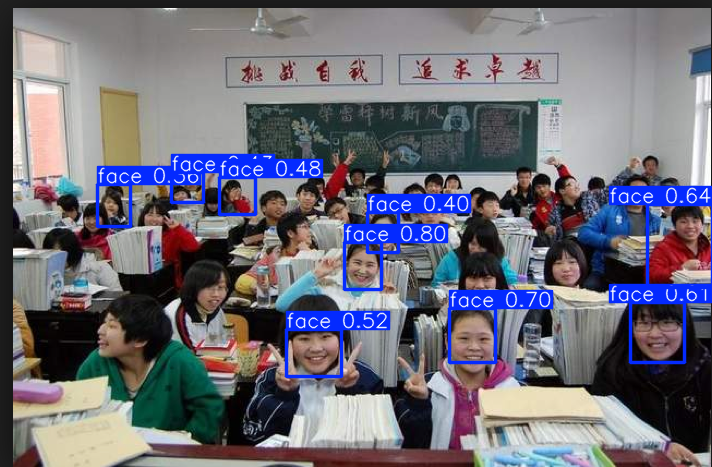

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

imagePath = 'https://i.pinimg.com/originals/9e/35/40/9e3540de132b4bbea1ad48467538db33.png'

results = model.predict(source=imagePath)

face_count = 0
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image
    face_count += len(r.boxes.xyxy)

print("检测到的人脸数量:", face_count)

#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)